Groupe 5 3iir / Equipe 4 : Joudar Samia, Laachar Mariam , Mahi Salama , Benhida Oussama , Yassir Benjima


<>:50: SyntaxWarning: invalid escape sequence '\d'
<>:50: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Yassir\AppData\Local\Temp\ipykernel_28604\4069747453.py:50: SyntaxWarning: invalid escape sequence '\d'
  SeriesSeasons['seasons'] = SeriesSeasons['duration'].str.extract('(\d+)').astype(int)


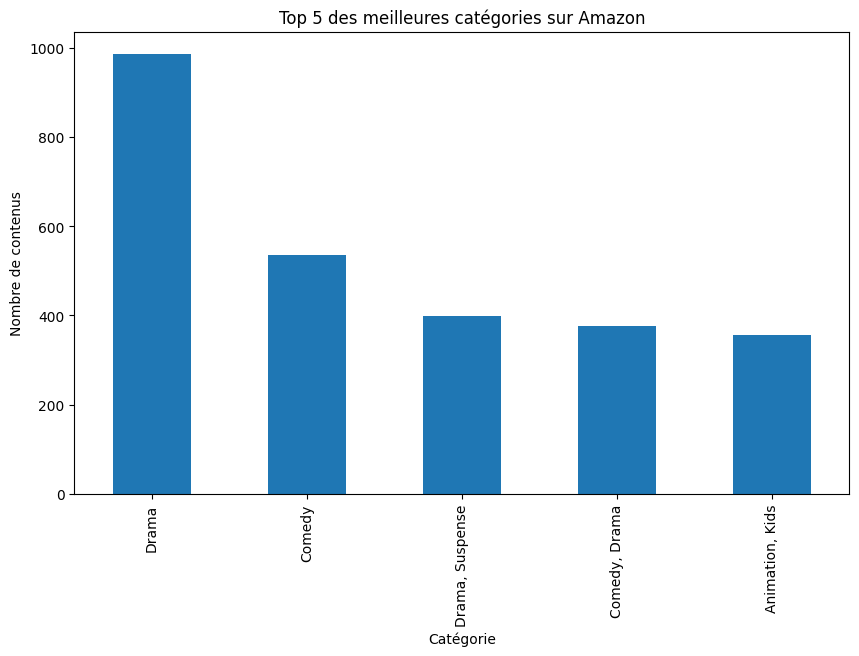

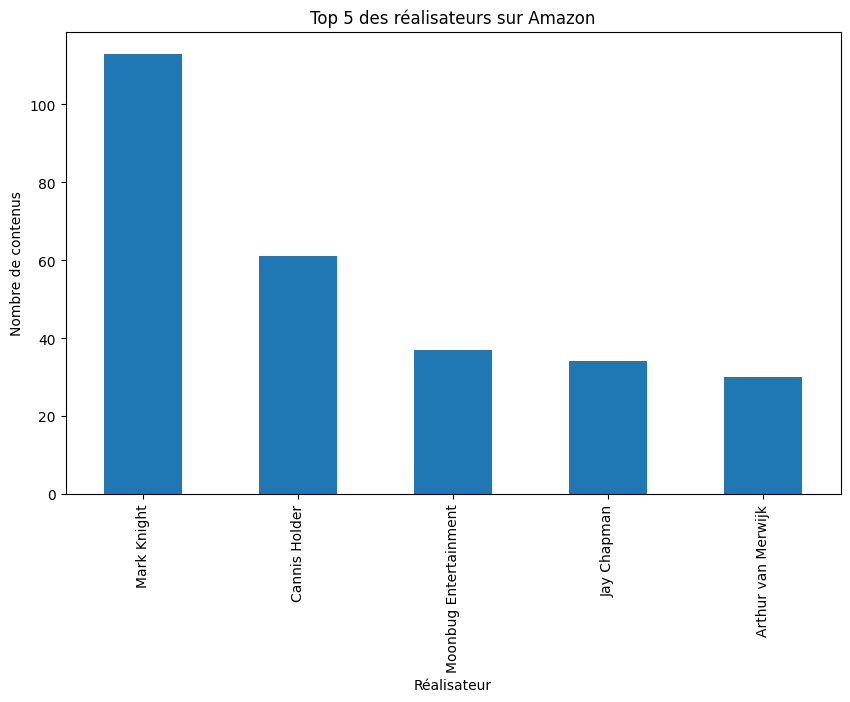

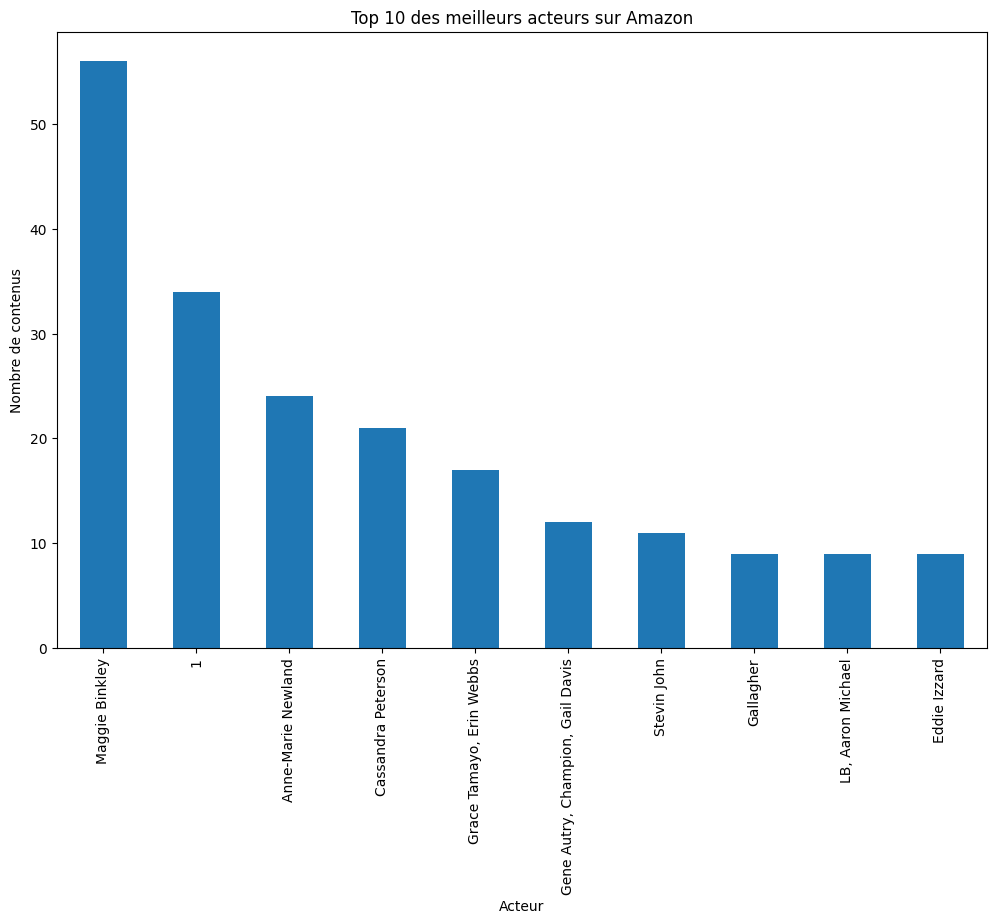

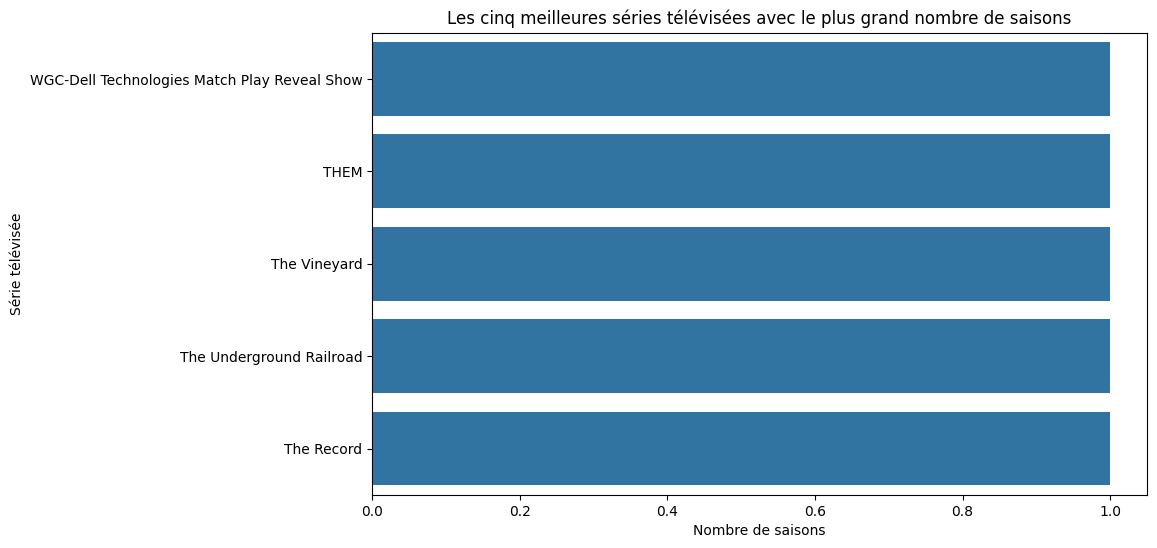

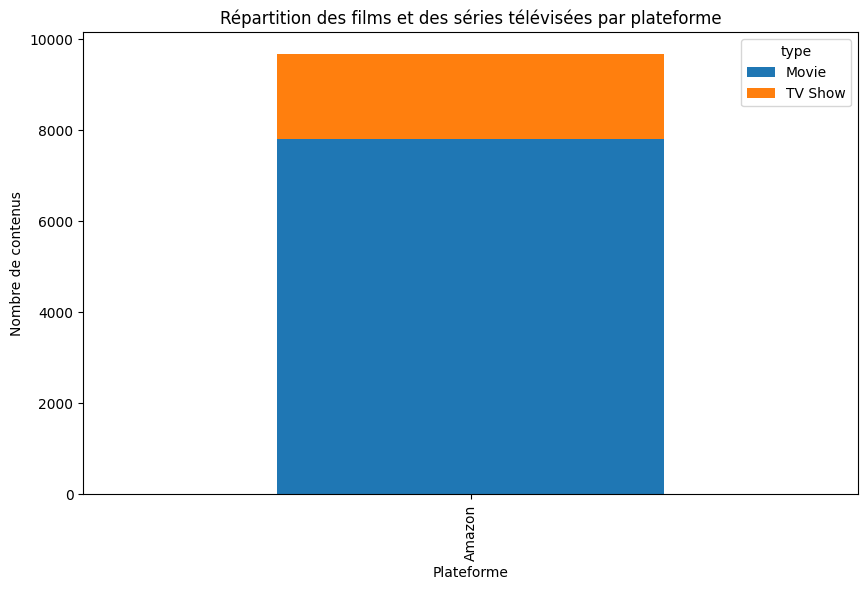

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

amazon = pd.read_csv("https://raw.githubusercontent.com/EMSIMa/ADD3IIR/main/Projet/Datasets/amazon.csv")
amazon.head()

topCategories = amazon['listed_in'].value_counts().head(5)
topCategories

topDirectors = amazon['director'].value_counts().head(5)
topDirectors

topActors = amazon['cast'].value_counts().head(10)
topActors

SeriesSeasons = amazon[amazon['type'] == 'TV Show'].nlargest(5, 'release_year')
SeriesSeasons[['title', 'duration']]

amazon['platform'] = 'Amazon'
content_type_count = amazon.groupby(['platform', 'type']).size().unstack(fill_value=0)


# un graphique pour les cinq meilleures catégories
plt.figure(figsize=(10,6))
topCategories.plot(kind='bar')
plt.title('Top 5 des meilleures catégories sur Amazon')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de contenus')
plt.show()

# un graphique pour les top 5 des réalisateurs
plt.figure(figsize=(10,6))
topDirectors.plot(kind='bar')
plt.title('Top 5 des réalisateurs sur Amazon')
plt.xlabel('Réalisateur')
plt.ylabel('Nombre de contenus')
plt.show()

# un graphique pour les dix meilleurs acteurs
plt.figure(figsize=(12,8))
topActors.plot(kind='bar')
plt.title('Top 10 des meilleurs acteurs sur Amazon')
plt.xlabel('Acteur')
plt.ylabel('Nombre de contenus')
plt.show()


# un graphique pour les cinq meilleures séries télévisées avec le plus grand nombre de saisons
SeriesSeasons['seasons'] = SeriesSeasons['duration'].str.extract('(\d+)').astype(int)
plt.figure(figsize=(10,6))
sns.barplot(x='seasons', y='title', data=SeriesSeasons)
plt.title('Les cinq meilleures séries télévisées avec le plus grand nombre de saisons')
plt.xlabel('Nombre de saisons')
plt.ylabel('Série télévisée')
plt.show()

# un graphique pour visualiser la répartition des films et des séries télévisées par plateforme
content_type_count.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Répartition des films et des séries télévisées par plateforme')
plt.xlabel('Plateforme')
plt.ylabel('Nombre de contenus')
plt.show()




tfidf_matrix = TfidfVectorizer(stop_words='english').fit_transform(amazon['description'])

# Calcul de la similarité cosinus entre les descriptions et récupération des indices des contenus similaires
similar_indices = cosine_similarity(tfidf_matrix[0], tfidf_matrix).flatten().argsort()[::-1][1:6]

# Récupération des titres des contenus similaires
similar_titles = amazon.loc[similar_indices, 'title'].tolist()

# Création du graphique
plt.figure(figsize=(10, 6))
plt.barh(similar_titles, width=cosine_similarity(tfidf_matrix[0], tfidf_matrix[similar_indices])[0], color='skyblue')
plt.xlabel('Similarité cosinus')
plt.ylabel('Titre du contenu similaire')
plt.title(f'Contenus similaires à "{amazon.loc[0, "title"]}"')
plt.show()